# Tutorial: Reading NG76 dataset with long evolution last row

We start by importing the required packages. (See notebook `setup` for the *resonantstate* package installation)

Feel free to uncomment the !pip lines to install the packages if you don't have them in your computer or virtual environment.

In [32]:
# Get necessary imports
# !pip install numpy
import numpy as np
# !pip install pandas
import pandas as pd
# !pip install graphviz
import graphviz
from resonantstate.data_download import get_metadata_simulations, download_simulations_run_table, download_simulations

Here's some constants for reference

In [33]:
# Units
Msun = 1.98855e30 # kg
G = 6.6743015e-11 # m^3/kgs^2
Mearth = 5.9722e24 #kg

# Conversion of angles
degrees = 180/np.pi # º
rad = np.pi/180 # rad

# Radius and Distances
au = 1.495978707e11 # m
Rsun = 6.957e8 # m
Rjup = 7.1492e7 # m

## Getting the data

We first get the level 0 of the simulations metadata from DACE

In [34]:
simulation_metadata_table = get_metadata_simulations()
simulation_metadata_table

,contact_mail,simulation_type,run_id,run_name,number_of_runs,maximum_number_of_planets,code_used,bibtex,url_of_table
0,sarehataiee@um.ac.ir,hydrodynamical_simulation,0,01,7,2,2000A&AS..141..165M,2021A&A...648A..69A,https://dace.unige.ch/downloads/resonant_state...
1,sarehataiee@um.ac.ir,hydrodynamical_simulation,1,02,7,3,2000A&AS..141..165M,2021A&A...648A..69A,https://dace.unige.ch/downloads/resonant_state...
2,sarehataiee@um.ac.ir,hydrodynamical_simulation,2,03,7,2,2000A&AS..141..165M,2021A&A...648A..69A,https://dace.unige.ch/downloads/resonant_state...
3,sarehataiee@um.ac.ir,hydrodynamical_simulation,3,04,7,3,2000A&AS..141..165M,2021A&A...648A..69A,https://dace.unige.ch/downloads/resonant_state...
4,sara.marques@unibe.ch,population_synthesis,0,NG132,995,31,,2021A&A...656A..72B,https://dace.unige.ch/downloads/resonant_state...
5,sara.marques@unibe.ch,population_synthesis,1,NG137,991,24,,"2021A&A...656A..69E, 2021A&A...656A..70E",https://dace.unige.ch/downloads/resonant_state...
6,sara.marques@unibe.ch,population_synthesis,2,NG140,996,21,,"2021A&A...656A..69E, 2021A&A...656A..70E",https://dace.unige.ch/downloads/resonant_state...
7,sara.marques@unibe.ch,population_synthesis,3,NG76,995,31,,"2021A&A...656A..69E, 2021A&A...656A..70E, http...",https://dace.unige.ch/downloads/resonant_state...
8,sara.marques@unibe.ch,population_synthesis,4,NGM10,972,25,,2021A&A...656A..72B,https://dace.unige.ch/downloads/resonant_state...
9,sara.marques@unibe.ch,population_synthesis,5,NGM11,998,28,,2021A&A...656A..72B,https://dace.unige.ch/downloads/resonant_state...


We want to get the simulations data of the NG76 system, run_id 3

In [35]:
simulation_NG76 = simulation_metadata_table[simulation_metadata_table["run_name"] == "NG76"] # One way to get the good line
simulation_NG76 = simulation_metadata_table.loc[[7], :] # another way. Note the bracket around the indices to keep it as a dataframe
simulation_NG76

,contact_mail,simulation_type,run_id,run_name,number_of_runs,maximum_number_of_planets,code_used,bibtex,url_of_table
7,sara.marques@unibe.ch,population_synthesis,3,NG76,995,31,,"2021A&A...656A..69E, 2021A&A...656A..70E, http...",https://dace.unige.ch/downloads/resonant_state...


We can now download the table of all the simulations of the run_id 3, NG76 system. This table contains a description of the planets at the end of the simulation for the 995 different simulations of the NG76 system.

In [36]:
NG76_table = download_simulations_run_table(simulation_NG76)
NG76_table

,simulation_type,run_id,run_name,simulation_id,contact_mail,planet_name,period_days,radius_planet_r_earth,mass_planet_m_earth,mass_star_m_sun,...,nb_planets,star_name,physics_implemented,bibtex,code_used,other_remarks,metadata_file,additional_info,readme_file,url_of_simulation
0,population_synthesis,3,NG76,001,sara.marques@unibe.ch,04,33.834785,14.187691,3.566812,1.0,...,17,Sun,population_synthesis,"2021A&A...656A..69E, 2021A&A...656A..70E, http...",,Contains long evolution at t=5e9 yr calculated...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
1,population_synthesis,3,NG76,001,sara.marques@unibe.ch,06,34001.996075,1.098859,0.236286,1.0,...,17,Sun,population_synthesis,"2021A&A...656A..69E, 2021A&A...656A..70E, http...",,Contains long evolution at t=5e9 yr calculated...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
2,population_synthesis,3,NG76,001,sara.marques@unibe.ch,100,49059.735222,0.811242,0.115647,1.0,...,17,Sun,population_synthesis,"2021A&A...656A..69E, 2021A&A...656A..70E, http...",,Contains long evolution at t=5e9 yr calculated...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
3,population_synthesis,3,NG76,001,sara.marques@unibe.ch,13,323.349942,10.127179,1.845242,1.0,...,17,Sun,population_synthesis,"2021A&A...656A..69E, 2021A&A...656A..70E, http...",,Contains long evolution at t=5e9 yr calculated...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
4,population_synthesis,3,NG76,001,sara.marques@unibe.ch,19,5905.654474,4.428443,2.812652,1.0,...,17,Sun,population_synthesis,"2021A&A...656A..69E, 2021A&A...656A..70E, http...",,Contains long evolution at t=5e9 yr calculated...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13534,population_synthesis,3,NG76,999,sara.marques@unibe.ch,70,17662.408284,0.791026,0.135491,1.0,...,19,Sun,population_synthesis,"2021A&A...656A..69E, 2021A&A...656A..70E, http...",,Contains long evolution at t=5e9 yr calculated...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
13535,population_synthesis,3,NG76,999,sara.marques@unibe.ch,73,1236.006444,2.871639,3.365679,1.0,...,19,Sun,population_synthesis,"2021A&A...656A..69E, 2021A&A...656A..70E, http...",,Contains long evolution at t=5e9 yr calculated...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
13536,population_synthesis,3,NG76,999,sara.marques@unibe.ch,92,44688.675379,2.278850,0.190955,1.0,...,19,Sun,population_synthesis,"2021A&A...656A..69E, 2021A&A...656A..70E, http...",,Contains long evolution at t=5e9 yr calculated...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
13537,population_synthesis,3,NG76,999,sara.marques@unibe.ch,93,5333.266159,3.257686,2.453186,1.0,...,19,Sun,population_synthesis,"2021A&A...656A..69E, 2021A&A...656A..70E, http...",,Contains lon

You may be interested to keep planets with certain conditions, looking for pairs of resonance, etc.
In this notebook we simply want to extract 1 simulation of the chosen run.


We want to keep the information only about 1 single run. Lets take the first run, simulation id = 001

In [37]:
NG76_run_1 = NG76_table[NG76_table["simulation_id"] == "001"]
NG76_run_1

,simulation_type,run_id,run_name,simulation_id,contact_mail,planet_name,period_days,radius_planet_r_earth,mass_planet_m_earth,mass_star_m_sun,...,nb_planets,star_name,physics_implemented,bibtex,code_used,other_remarks,metadata_file,additional_info,readme_file,url_of_simulation
0,population_synthesis,3,NG76,001,sara.marques@unibe.ch,04,33.834785,14.187691,3.566812,1.0,...,17,Sun,population_synthesis,"2021A&A...656A..69E, 2021A&A...656A..70E, http...",,Contains long evolution at t=5e9 yr calculated...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
1,population_synthesis,3,NG76,001,sara.marques@unibe.ch,06,34001.996075,1.098859,0.236286,1.0,...,17,Sun,population_synthesis,"2021A&A...656A..69E, 2021A&A...656A..70E, http...",,Contains long evolution at t=5e9 yr calculated...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
2,population_synthesis,3,NG76,001,sara.marques@unibe.ch,100,49059.735222,0.811242,0.115647,1.0,...,17,Sun,population_synthesis,"2021A&A...656A..69E, 2021A&A...656A..70E, http...",,Contains long evolution at t=5e9 yr calculated...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
3,population_synthesis,3,NG76,001,sara.marques@unibe.ch,13,323.349942,10.127179,1.845242,1.0,...,17,Sun,population_synthesis,"2021A&A...656A..69E, 2021A&A...656A..70E, http...",,Contains long evolution at t=5e9 yr calculated...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
4,population_synthesis,3,NG76,001,sara.marques@unibe.ch,19,5905.654474,4.428443,2.812652,1.0,...,17,Sun,population_synthesis,"2021A&A...656A..69E, 2021A&A...656A..70E, http...",,Contains long evolution at t=5e9 yr calculated...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
5,population_synthesis,3,NG76,001,sara.marques@unibe.ch,43,29.650902,0.491824,0.106437,1.0,...,17,Sun,population_synthesis,"2021A&A...656A..69E, 2021A&A...656A..70E, http...",,Contains long evolution at t=5e9 yr calculated...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
6,population_synthesis,3,NG76,001,sara.marques@unibe.ch,45,272.627837,11.296860,1.788447,1.0,...,17,Sun,population_synthesis,"2021A&A...656A..69E, 2021A&A...656A..70E, http...",,Contains long evolution at t=5e9 yr calculated...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
7,population_synthesis,3,NG76,001,sara.marques@unibe.ch,46,1968.363684,5.364378,0.272125,1.0,...,17,Sun,population_synthesis,"2021A&A...656A..69E, 2021A&A...656A..70E, http...",,Contains long evolution at t=5e9 yr calculated...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
8,population_synthesis,3,NG76,001,sara.marques@unibe.ch,49,438.118933,10.256051,2.246656,1.0,...,17,Sun,population_synthesis,"2021A&A...656A..69E, 2021A&A...656A..70E, http...",,Contains long evolution at t=5e9 yr calculated...,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.c

Finally we can download the simulation data of this run:

In [38]:
download_simulation_destination = None # you can set that variable to a path you would like to save the simulation data
ng76_run1_data = download_simulations(NG76_run_1, download_destination=download_simulation_destination)


This is a basically how you can access simulation data from DACE. 
- First get the metadata of all the runs (level 0) with `get_metadata_simulations`
- Extract the one run_id you want to have more information on manipulating the level 0 dataframe and use `download_simulations_run_table` (level 1)
- Get the simulation data using `download_simulations_run_table` of the planets you are interested into (level 3)

### Using the data

This function `download_simulations` returns a list of simulations. In our case we selected only one simulation so we have only 1 element in this list.
Each element of the list is a dictionnary containing the simulation data and some info about it

In [39]:
for k, v in ng76_run1_data[0].items():
    if k in ["simulation", "readme", "metadata", "additional_info"]:
        print(f"{k}:\t...") # hide the lengthy values
    else:
        print(f"{k}:\t{v}")


simulation_name:	population_synthesis_3_001
planets_list:	['04', '06', '13', '19', '43', '45', '46', '49', '59', '67', '78', '82', '83', '85', '89', '97', '100']
code:	
bibtex:	['2021A&A...656A..69E', '2021A&A...656A..70E', 'https://doi.org/10.1140/epjp/s13360-023-03784-x', 'https://doi.org/10.1038/s41550-023-02183-7']
contact_email:	sara.marques@unibe.ch
additional_info:	...
simulation:	...


The data is a pandas dataframe

In [40]:
# Open data
data = ng76_run1_data[0]["simulation"]

# See database
data

,time_stamp,mean_longitude_deg_0,period_days_0,k_0,h_0,inclination_deg_0,longitude_of_ascending_node_deg_0,mass_planet_star_ratio_0,radius_planet_star_ratio_0,mean_longitude_deg_1,...,non_surviving_inclination_deg_82,non_surviving_longitude_of_ascending_node_deg_82,non_surviving_mass_planet_star_ratio_82,non_surviving_radius_planet_star_ratio_82,non_surviving_f_ice_82,non_surviving_t_mig_82,non_surviving_t_damp_e_82,non_surviving_t_damp_i_82,non_surviving_mass_gas_disk_82,non_surviving_mass_plts_82
0,1.000000e+02,75.408040,6064.471632,0.000133,0.000631,0.018712,224.292998,3.090474e-08,0.000878,284.695953,...,0.000680,246.464637,5.875591e-08,0.000813,0.0,10965581.0,12539.556,17979.567,0.042290,102.16102
1,1.151395e+02,20.755344,6064.540958,0.000138,0.000636,0.018712,224.292780,3.102919e-08,0.000879,345.226174,...,0.000734,239.509330,6.057690e-08,0.000821,0.0,10352503.0,12042.597,17267.005,0.042289,102.13797
2,1.325711e+02,86.301233,6064.469396,0.000127,0.000633,0.018711,224.292442,3.120308e-08,0.000881,69.581776,...,0.000822,230.604414,6.271016e-08,0.000830,0.0,9636995.1,11478.413,16458.050,0.042289,102.10928
3,1.526418e+02,103.436568,6064.508392,0.000124,0.000633,0.018711,224.291313,3.135763e-08,0.000882,144.340770,...,0.000911,223.374827,6.425926e-08,0.000837,0.0,9171974.2,11076.139,15881.257,0.042288,102.08655
4,1.757511e+02,257.160206,6064.446753,0.000126,0.000629,0.018710,224.290322,3.156880e-08,0.000884,246.176059,...,0.001048,214.653963,6.593839e-08,0.000844,0.0,8863900.5,10636.680,15251.210,0.042288,102.05876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6.551286e+07,269.373506,33.850629,0.001008,0.000528,0.016506,230.437082,1.071288e-05,0.147375,68.303591,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,7.543120e+07,42.933435,33.825883,0.000397,-0.001023,0.029439,105.628247,1.071288e-05,0.146417,315.276649,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,8.685114e+07,178.772499,33.835967,-0.000186,0.000148,0.028906,357.953899,1.071288e-05,0.145584,262.365687,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,1.000000e+08,297.656251,33.834785,0.000642,0.000556,0.042490,5.720136,1.071288e-05,0.144373,346.820505,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the dictionnary, we can get the list of the surviving planets at the end of the simulation.

In [41]:
# Get list of surviving planets
planets_list = ng76_run1_data[0]['planets_list']
planets_list

['04',
 '06',
 '13',
 '19',
 '43',
 '45',
 '46',
 '49',
 '59',
 '67',
 '78',
 '82',
 '83',
 '85',
 '89',
 '97',
 '100']

### Required Columns

So, following the structure of the required data in the instructions file, we can collect the columns for each planet in the ```planets_list```. The columns name of the planets parameters is given below, ignoring the timestamps, the additional information about the planet and the star parameters:

In [42]:
planet_columns_names = [
    'mean_longitude_deg',
    'period_days',
    'k',
    'h',
    'inclination_deg',
    'longitude_of_ascending_node_deg',
    'mass_planet_star_ratio',
    'radius_planet_star_ratio'
    ]
planet_columns_names

['mean_longitude_deg',
 'period_days',
 'k',
 'h',
 'inclination_deg',
 'longitude_of_ascending_node_deg',
 'mass_planet_star_ratio',
 'radius_planet_star_ratio']

using the indexation, we can get all the columns about the i-th planet. Let's see the data for the first planet ``"04"`` at the index 0. 

In [43]:
iplanet = 7
required_columns = [f"{col}_{iplanet}" for col in planet_columns_names]
print(required_columns)
if len(required_columns) > 0:
    display(data[required_columns])

['mean_longitude_deg_7', 'period_days_7', 'k_7', 'h_7', 'inclination_deg_7', 'longitude_of_ascending_node_deg_7', 'mass_planet_star_ratio_7', 'radius_planet_star_ratio_7']


,mean_longitude_deg_7,period_days_7,k_7,h_7,inclination_deg_7,longitude_of_ascending_node_deg_7,mass_planet_star_ratio_7,radius_planet_star_ratio_7
0,198.094696,14801.378990,0.000450,0.000319,0.015804,49.893840,3.036805e-08,0.000873
1,323.203685,14801.378990,0.000454,0.000313,0.015804,49.894039,3.041556e-08,0.000874
2,137.560674,14801.326298,0.000454,0.000320,0.015803,49.893926,3.048182e-08,0.000874
3,292.083779,14801.373344,0.000455,0.000313,0.015803,49.893964,3.054058e-08,0.000875
4,142.570638,14801.309362,0.000449,0.000313,0.015803,49.893913,3.062068e-08,0.000876
...,...,...,...,...,...,...,...,...
95,182.394221,437.898155,0.000380,-0.000535,0.017618,231.885708,6.747806e-06,0.119981
96,148.672366,438.086219,-0.000849,-0.000169,0.028481,107.988014,6.747806e-06,0.114509
97,59.349897,438.317625,0.001175,0.000078,0.028585,0.906124,6.747806e-06,0.109261
98,90.213582,438.118933,0.000954,0.002060,0.040645,4.163296,6.747806e-06,0.104365


In [44]:
iplanet = 0
required_columns = [f"{col}_{iplanet}" for col in planet_columns_names]
print(required_columns)
if len(required_columns) > 0:
    display(data[required_columns])

['mean_longitude_deg_0', 'period_days_0', 'k_0', 'h_0', 'inclination_deg_0', 'longitude_of_ascending_node_deg_0', 'mass_planet_star_ratio_0', 'radius_planet_star_ratio_0']


,mean_longitude_deg_0,period_days_0,k_0,h_0,inclination_deg_0,longitude_of_ascending_node_deg_0,mass_planet_star_ratio_0,radius_planet_star_ratio_0
0,75.408040,6064.471632,0.000133,0.000631,0.018712,224.292998,3.090474e-08,0.000878
1,20.755344,6064.540958,0.000138,0.000636,0.018712,224.292780,3.102919e-08,0.000879
2,86.301233,6064.469396,0.000127,0.000633,0.018711,224.292442,3.120308e-08,0.000881
3,103.436568,6064.508392,0.000124,0.000633,0.018711,224.291313,3.135763e-08,0.000882
4,257.160206,6064.446753,0.000126,0.000629,0.018710,224.290322,3.156880e-08,0.000884
...,...,...,...,...,...,...,...,...
95,269.373506,33.850629,0.001008,0.000528,0.016506,230.437082,1.071288e-05,0.147375
96,42.933435,33.825883,0.000397,-0.001023,0.029439,105.628247,1.071288e-05,0.146417
97,178.772499,33.835967,-0.000186,0.000148,0.028906,357.953899,1.071288e-05,0.145584
98,297.656251,33.834785,0.000642,0.000556,0.042490,5.720136,1.071288e-05,0.144373


As you can see, the last line contains some of the long evolution data but every since variable has data (like the mean longitude, k, h, and longitude of ascending node).

As a suggestion, we can take the values from the row before to replace the ``NaN`` for column in the database.

In [45]:
for col in data.columns.to_list():
    if np.isnan(data[col].iloc[-1]):
        data[col].iloc[-1] = data[col].iloc[-2]

if len(required_columns) > 0:
    display(data[required_columns])

/tmp/ipykernel_298827/2707726185.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[col].iloc[-1] = data[col].iloc[-2]


,mean_longitude_deg_0,period_days_0,k_0,h_0,inclination_deg_0,longitude_of_ascending_node_deg_0,mass_planet_star_ratio_0,radius_planet_star_ratio_0
0,75.408040,6064.471632,0.000133,0.000631,0.018712,224.292998,3.090474e-08,0.000878
1,20.755344,6064.540958,0.000138,0.000636,0.018712,224.292780,3.102919e-08,0.000879
2,86.301233,6064.469396,0.000127,0.000633,0.018711,224.292442,3.120308e-08,0.000881
3,103.436568,6064.508392,0.000124,0.000633,0.018711,224.291313,3.135763e-08,0.000882
4,257.160206,6064.446753,0.000126,0.000629,0.018710,224.290322,3.156880e-08,0.000884
...,...,...,...,...,...,...,...,...
95,269.373506,33.850629,0.001008,0.000528,0.016506,230.437082,1.071288e-05,0.147375
96,42.933435,33.825883,0.000397,-0.001023,0.029439,105.628247,1.071288e-05,0.146417
97,178.772499,33.835967,-0.000186,0.000148,0.028906,357.953899,1.071288e-05,0.145584
98,297.656251,33.834785,0.000642,0.000556,0.042490,5.720136,1.071288e-05,0.144373


One may prefer to work with the planet name directly. We can replace the index of the planet with the planet name itself. Planet 04 being at index 0, we will replace the index 0 by 4. Because the name are also int, be careful not to run this cell twice!. (also be mindful if you cast your planet name from string to int the name will change or you may even have an error)

In [46]:
try: 
    # Create the columns names and dictionary to replace it on dataframe
    replace_dict = {}
    for n in range(len(planets_list)):
        required_columns = [f"{col}_{n}" for col in planet_columns_names]
        columns_planet = [f"{name}_{planets_list[n]}" for name in planet_columns_names]
        replace_dict.update(dict(zip(required_columns, columns_planet)))
    # Replace the names of the variables
    data = data.rename(columns=replace_dict)
    # See the required for the planet
    columns_planet = [f"{name}_{planets_list[iplanet]}" for name in planet_columns_names]
    display(data[columns_planet])
except:
    pass


,mean_longitude_deg_04,period_days_04,k_04,h_04,inclination_deg_04,longitude_of_ascending_node_deg_04,mass_planet_star_ratio_04,radius_planet_star_ratio_04
0,75.408040,6064.471632,0.000133,0.000631,0.018712,224.292998,3.090474e-08,0.000878
1,20.755344,6064.540958,0.000138,0.000636,0.018712,224.292780,3.102919e-08,0.000879
2,86.301233,6064.469396,0.000127,0.000633,0.018711,224.292442,3.120308e-08,0.000881
3,103.436568,6064.508392,0.000124,0.000633,0.018711,224.291313,3.135763e-08,0.000882
4,257.160206,6064.446753,0.000126,0.000629,0.018710,224.290322,3.156880e-08,0.000884
...,...,...,...,...,...,...,...,...
95,269.373506,33.850629,0.001008,0.000528,0.016506,230.437082,1.071288e-05,0.147375
96,42.933435,33.825883,0.000397,-0.001023,0.029439,105.628247,1.071288e-05,0.146417
97,178.772499,33.835967,-0.000186,0.000148,0.028906,357.953899,1.071288e-05,0.145584
98,297.656251,33.834785,0.000642,0.000556,0.042490,5.720136,1.071288e-05,0.144373


After these required columns for the planets, we can also get the two required columns for the Star.

In [47]:
star_columns_index = len(planets_list)*8 + 1 # the star element starting at 1 + N*8 + 1
star_column_names = data.columns[star_columns_index:star_columns_index +2].values.tolist()
star_column_names

['mass_star_m_sun', 'radius_star_r_sun']

In [48]:
# Get Star Data
data[star_column_names] # in Msun and Rsun, respectively.

,mass_star_m_sun,radius_star_r_sun
0,1.0,3.091846
1,1.0,3.091846
2,1.0,3.091846
3,1.0,3.091846
4,1.0,3.091846
...,...,...
95,1.0,0.897286
96,1.0,0.898738
97,1.0,0.899703
98,1.0,0.900938


Let's not forget that the first column is actually the time in years. 

For this dataset, we sampled logarithmically the time from $t=1000$ years to $t=10^8$ years and we added the last row for the state of the simulation at $t=5\times10^9$ years.

In [49]:
# Replace the names of the variables
timestamp_name = data.columns[0]
timestamp_name

'time_stamp'

In [50]:
data[[timestamp_name]]

,time_stamp
0,1.000000e+02
1,1.151395e+02
2,1.325711e+02
3,1.526418e+02
4,1.757511e+02
...,...
95,6.551286e+07
96,7.543120e+07
97,8.685114e+07
98,1.000000e+08


## Extra Information

### For Surviving Planets

We added some extra columns for each surviving planet in the simulations, containing information we thought would be relevant for further analysis. 

For these planets, these columns include:
- fraction of ice;
- migration timescale in years;
- eccentricity damping timescale in years;
- inclination damping timescale in years;
- mass of gas disk in $M_\odot$;
- mass of planetesimals in $M_\oplus$.

We can also collect those and analyse it for our planet 4, also renaming the index by the planet name

In [51]:
extra_columns_names = ['f_ice', 't_mig', 't_damp_e', 't_damp_i', 'mass_gas_disk', 'mass_plts']
try:
    extra_columns = []
    replace_dict = {}
    for n in range(len(planets_list)):#
        extra_columns.append(range(6*(n)+1+star_columns_index+1, 6*n+6+1+star_columns_index+1))
        required_columns = [f"{col}_{n}" for col in extra_columns_names]
        columns_planet = [f"{name}_{planets_list[n]}" for name in extra_columns_names]
        replace_dict.update(dict(zip(required_columns, columns_planet)))
    # Replace the names of the variables
    data = data.rename(columns=replace_dict)
    
    columns_planet = [f"{name}_{planets_list[iplanet]}" for name in extra_columns_names]
    display(data[columns_planet])


except Exception as e:
    print(f"Error: {e}")
    extra_columns_names = ['f_ice', 't_mig', 't_damp_e', 't_damp_i', 'mass_gas_disk', 'mass_plts']
    


,f_ice_04,t_mig_04,t_damp_e_04,t_damp_i_04,mass_gas_disk_04,mass_plts_04
0,0.504102,6.361993e+07,6.244185e+05,8.953201e+05,0.042290,102.161020
1,0.504102,6.336895e+07,6.219716e+05,8.918118e+05,0.042289,102.137970
2,0.504102,6.301851e+07,6.185770e+05,8.869444e+05,0.042289,102.109280
3,0.504102,6.267651e+07,6.155573e+05,8.826139e+05,0.042288,102.086550
4,0.504102,6.226626e+07,6.114614e+05,8.767413e+05,0.042288,102.058760
...,...,...,...,...,...,...
95,0.495919,1.000000e+20,1.000000e+20,1.000000e+20,0.000000,59.625676
96,0.495919,1.000000e+20,1.000000e+20,1.000000e+20,0.000000,59.579616
97,0.495919,1.000000e+20,1.000000e+20,1.000000e+20,0.000000,59.535753
98,0.495919,1.000000e+20,1.000000e+20,1.000000e+20,0.000000,59.484067


### Non Surviving Planets

The non-surviving planets list is given in the ```additional_info.json```, that is store in the dictionnary.

We also provide other information as the list of planets ejected from the system, accreted by the central Star and containing a mass below the minimum mass threshold (in this case of $0.1 M_\oplus$)

In [52]:

additional_info = ng76_run1_data[0]['additional_info']
    
# Get list of surviving planets
non_surviving_planets_list = additional_info['non_surviving_planets']
len(non_surviving_planets_list)

83

For these planets, we provide all the columns provided to the surviving planets together.
The order of the columns is as follows:
- 8 initial required columns in the structure and units provided in the activity B instructions.
- 6 additional columns explained previously for further analysis (see previous section).

We can collect the data for the first non surviving planet, planet ``01``. To do so, we need to collect the 14 following columns after the extra data of the last surviving planet.

In [53]:
# Non surviving first planet id
inplanet = 0

nonsurviving_columns = []
if len(planets_list) > 0:
    for i in range(len(non_surviving_planets_list)):
        nonsurviving_columns.append(range(14*(i)+1+extra_columns[-1][-1], 14*i+14+1+extra_columns[-1][-1]))
else:
    for i in range(len(non_surviving_planets_list)):
        nonsurviving_columns.append(range(14*(i)+1+star_columns_index+1, 14*i+14+1+star_columns_index+1))
    
print(f"non surviging planet list:\n{non_surviving_planets_list}")
non_surviving_column_names = planet_columns_names + extra_columns_names
non_surviving_column_names = [f"non_surviving_{name}" for name in non_surviving_column_names]  
non_surviving_column_names

non surviging planet list:
['001', '002', '003', '005', '007', '008', '009', '010', '011', '012', '014', '015', '016', '017', '018', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '044', '047', '048', '050', '051', '052', '053', '054', '055', '056', '057', '058', '060', '061', '062', '063', '064', '065', '066', '068', '069', '070', '071', '072', '073', '074', '075', '076', '077', '079', '080', '081', '084', '086', '087', '088', '090', '091', '092', '093', '094', '095', '096', '098', '099']


['non_surviving_mean_longitude_deg',
 'non_surviving_period_days',
 'non_surviving_k',
 'non_surviving_h',
 'non_surviving_inclination_deg',
 'non_surviving_longitude_of_ascending_node_deg',
 'non_surviving_mass_planet_star_ratio',
 'non_surviving_radius_planet_star_ratio',
 'non_surviving_f_ice',
 'non_surviving_t_mig',
 'non_surviving_t_damp_e',
 'non_surviving_t_damp_i',
 'non_surviving_mass_gas_disk',
 'non_surviving_mass_plts']

In [54]:
# Create the columns names and dictionary to replace it on dataframe
replace_dict = {}
for n in range(len(non_surviving_planets_list)):
    non_surviving_columns = [f"{col}_{n}" for col in non_surviving_column_names]
    non_surviving_column_planet = [f"{name}_{non_surviving_planets_list[n]}" for name in non_surviving_column_names]
    replace_dict.update(dict(zip(non_surviving_columns, non_surviving_column_planet)))    
data = data.rename(columns=replace_dict)



# Replace the names of the variables
non_surviving_column_planet = [f"{name}_{non_surviving_planets_list[inplanet]}" for name in non_surviving_column_names]
data[non_surviving_column_planet]

,non_surviving_mean_longitude_deg_001,non_surviving_period_days_001,non_surviving_k_001,non_surviving_h_001,non_surviving_inclination_deg_001,non_surviving_longitude_of_ascending_node_deg_001,non_surviving_mass_planet_star_ratio_001,non_surviving_radius_planet_star_ratio_001,non_surviving_f_ice_001,non_surviving_t_mig_001,non_surviving_t_damp_e_001,non_surviving_t_damp_i_001,non_surviving_mass_gas_disk_001,non_surviving_mass_plts_001
0,323.669960,55.312585,0.000386,0.000114,0.014325,295.254686,4.871217e-08,0.000763,0.0,18575705.0,90449.502,129688.60,0.042290,102.16102
1,321.304114,55.312652,0.001183,-0.000672,0.014329,294.654558,4.993331e-08,0.000769,0.0,18807426.0,88139.929,126389.73,0.042289,102.13797
2,178.354757,55.309884,0.001212,-0.001814,0.014381,293.515650,5.135638e-08,0.000776,0.0,18967553.0,85586.055,122777.99,0.042289,102.10928
3,127.533918,55.312888,0.000355,-0.001294,0.014350,292.672233,5.243459e-08,0.000782,0.0,18161219.0,83821.123,120225.23,0.042288,102.08655
4,291.409858,55.309446,-0.000395,0.000226,0.014345,291.259056,5.372567e-08,0.000788,0.0,15914503.0,81839.857,117342.72,0.042288,102.05876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
#data[non_surviving_column_planet].mass_1.iloc[-1] * 1.98855e30 / 5.9722e24

## Status Diagram

As you can see, at some point the rows don't contain values anymore (```NaN```). This is because the planet did not survive the full simulation, it was accreted or ejected... and so on. The first row containing NaN allows us to track back the time in which the planet "disappeared".

Then, using the dictionary of status in the ```additional_info.json``` allows us to understand what happened to it more in detail.
The status code can be:
- negative: where the absolute value corresponds to the ID of the planet that accreted it;
- 0: all went fine and the planet survived in the end (not used in this case);
- 2: planet was ejected from the system ($a\geq1000$ au);
- 3: planet was accreted by the central Star;
- 5 & 6: situations in which it was not possible to do the evolution of this planet;
- 8: the core of the planet was fully evaporated;
- 9: the planet tidally spiraled into the central Star;

In [56]:
# Get status dictionary
status_dictionary = additional_info["status_planets"]

# Finding time of "death"
try:
    idx = data[non_surviving_column_planet][data[non_surviving_column_planet].isnull().all(axis=1)].iloc[0].name
except:
    idx = -1
print(f"Planet did not survive with a status {int(status_dictionary[non_surviving_planets_list[inplanet]])} at time t = {data[timestamp_name].iloc[idx] :.2e} years.") 

Planet did not survive with a status -39 at time t = 3.91e+03 years.


This means that planet ``01`` was accreted by planet ``39``.

Yet, it can be more complex than that. Planets can accrete planets and get accreted by other planets.
To provide a visual aids to see these evolutions, a status diagram can be drawn.

In [57]:
list(status_dictionary.keys())

['001',
 '002',
 '003',
 '004',
 '005',
 '006',
 '007',
 '008',
 '009',
 '010',
 '011',
 '012',
 '013',
 '014',
 '015',
 '016',
 '017',
 '018',
 '019',
 '020',
 '021',
 '022',
 '023',
 '024',
 '025',
 '026',
 '027',
 '028',
 '029',
 '030',
 '031',
 '032',
 '033',
 '034',
 '035',
 '036',
 '037',
 '038',
 '039',
 '040',
 '041',
 '042',
 '043',
 '044',
 '045',
 '046',
 '047',
 '048',
 '049',
 '050',
 '051',
 '052',
 '053',
 '054',
 '055',
 '056',
 '057',
 '058',
 '059',
 '060',
 '061',
 '062',
 '063',
 '064',
 '065',
 '066',
 '067',
 '068',
 '069',
 '070',
 '071',
 '072',
 '073',
 '074',
 '075',
 '076',
 '077',
 '078',
 '079',
 '080',
 '081',
 '082',
 '083',
 '084',
 '085',
 '086',
 '087',
 '088',
 '089',
 '090',
 '091',
 '092',
 '093',
 '094',
 '095',
 '096',
 '097',
 '098',
 '099',
 '100']

In [58]:
planet_columns_names

['mean_longitude_deg',
 'period_days',
 'k',
 'h',
 'inclination_deg',
 'longitude_of_ascending_node_deg',
 'mass_planet_star_ratio',
 'radius_planet_star_ratio']

In [59]:
period_col_name = "period_days"
mass_col_name = "mass_planet_star_ratio"
def reorganize_status_data(status_dictionary: dict, params_dictionary: dict):
    """
    Reorganizes the data of the status_dictionary coming from the additional_info.json, into a better structure 
    for the status diagrams of the planets.
    
    Args:
        status_dictionary (dict): dictionary with status of simulations coming from additional_info.json.
        params_dictionary (dict): contains final mass and semi-major axis for each planet at the end of its simulation time.
        
    Returns:
        dict: status dictionary reorganized to be able to be drawn into a diagram.
    """
    
    # Initialize new status dictionary
    new_status_dictionary = {
        'star_accreted': [], 
        'survived': [],
        'ejected': [], 
        'too_small': [],
        'other': [],
        'label': {}
    }
    
    for p in range(1, 101):
        
        planet = f"{p:03d}"
        if planet in status_dictionary.keys():
            status = int(status_dictionary[planet])
        else:
            status = int(0)
        # Get status and parameters
        mass = params_dictionary[planet]['mass']
        a = params_dictionary[planet]['a']
        
        # Make label
        new_status_dictionary['label'][str(int(planet))] = "{:d}\n\n{:.2f} M⊕\n{:.2f} au".format(int(planet), mass, a)
        
        # Reorganize new information of status
        if status < 0:
            if str(np.abs(int(status))) not in list(new_status_dictionary.keys()):
                new_status_dictionary[str(np.abs(int(status)))] = [str(int(planet))]
            else:
                new_status_dictionary[str(np.abs(int(status)))].append(str(int(planet)))
        elif status == 0 and mass > 0.1:
            new_status_dictionary['survived'].append(str(int(planet)))
        elif status == 0 and mass <= 0.1:
            new_status_dictionary['too_small'].append(str(int(planet)))
        elif status == 2:
            new_status_dictionary['ejected'].append(str(int(planet)))
        elif status == 3:
            new_status_dictionary['star_accreted'].append(str(int(planet)))
        elif status > 3: 
            new_status_dictionary['other'].append(str(int(planet)))
    
    return new_status_dictionary
    

def draw_status_diagram(status_dictionary: dict):
    """
    Generates a diagram containing the evolution of the planets: 
        - if they are accreted by other planets;
        - if they are accreted by central star;
        - if they were ejected from the system;
        - if they survived the formation and evolution phases.
        
    Args:
        pathfile (str): path to save diagram (without the end extension ".something")
        directory (str): where it is supposed to be saved (folder level).
        status_dictionary (dict): contains the status of all planets in the simulation.
        
    Returns:
        graph: diagram from graphviz which can be displayed and saved.
    """
    # Create Diagram
    g = graphviz.Digraph("status_graph")
    g.attr(rankdir="TB", outputorder="nodesfirst")
    g.attr("node", shape="doublecircle", rank="same")
    
    # Create Nodes of survived planets
    for planet in status_dictionary["survived"]:
        g.node(str(planet), status_dictionary["label"][str(planet)], **{'width':str(2.5), 'height': str(2.5), 'fontsize': str(18)})

    # Add other relevant end Nodes
    g.attr("node", shape="tripleoctagon", rank="same")
    g.node('Accreted by Star', **{'width':str(2.5), 'height': str(2.5), 'fontsize': str(18)})
    g.node('Ejected', **{'width':str(2.5), 'height': str(2.5), 'fontsize': str(18)})
    g.node('Mass < 0.1 M⊕', **{'width':str(2.5), 'height': str(2.5), 'fontsize': str(18)})
    g.node('Other', **{'width':str(2.5), 'height': str(2.5), 'fontsize': str(18)})
    
    # Add intermediate planets Nodes
    g.attr("node", shape="circle")
    for i in range(1, 101):
        if str(i) not in status_dictionary["survived"]:
            g.node(str(i), status_dictionary["label"][str(i)], **{'width':str(1), 'height': str(1)})

    # Add all relevant edges
    for key in status_dictionary.keys():
        for val in status_dictionary[key]:
            if key == "survived":
                break
            elif key == "label":
                break
            elif key == "star_accreted":
                g.edge(str(val), "Accreted by Star")
            elif key == "too_small":
                g.edge(str(val), "Mass < 0.1 M⊕")
            elif key == "ejected":
                g.edge(str(val), "Ejected")
            elif key == "other":
                g.edge(str(val), "Other")
            else:
                g.edge(str(val), str(key))

    return g
    

def get_params(data: pd.DataFrame):
    """
    Collects the mass in MEarth and semi-major axis in AU for each planet in the simulation, having it survived in the end or not.
    
    Args:
        data (pd.DataFrame): dataframe from the simulation
    
    Returns:
        dict: dictionary of desired parameters (m, a) for each planet.
    """
    
    # Initialize dictionary
    params_dict = {}
    
    # Replace columns for surviving planets ALREADY DONE IN THE NOTEBOOK
    # replace_dict = {}
    # for n in range(len(planets_list)):
    #     required_columns = [f"{col}_{n}" for col in planet_columns_names]
    #     columns_planet = [f"{name}_{planets_list[n]}" for name in planet_columns_names]
    #     replace_dict.update(dict(zip(required_columns, columns_planet)))
    
    # # Replace the names of the variables
    # data.rename(columns=replace_dict, inplace=True)
    
    for i, ev in enumerate(planets_list):
        # Create the columns names and dictionary to replace it on dataframe
        columns_planet = [f"{name}_{planets_list[i]}" for name in planet_columns_names]

        # Get last semi-major axis
        period_array = np.array(data[f"{period_col_name}_{planets_list[i]}"])
        last_period = period_array[~np.isnan(period_array)][-1]
        a = calculate_a_from_period(last_period)
        
        # Get last mass
        mass_array = np.array(data[f"{mass_col_name}_{planets_list[i]}"])
        mass = mass_array[~np.isnan(mass_array)][-1] * Msun / Mearth
        
        # Generate and store parameters of the planet
        planet_data = {'mass': mass, 'a': a}
        params_dict[f"{int(ev):03d}"] = planet_data

    # Replace columns for non-surviving planets ALREADY DONE IN THE NOTEBOOK
    # replace_dict = {}
    # for n in range(len(non_surviving_planets_list)):
    #     required_columns = [f"{col}_{n}" for col in non_surviving_column_names]
    #     columns_planet = [f"{name}_{non_surviving_planets_list[n]}" for name in non_surviving_column_names]
    #     replace_dict.update(dict(zip(required_columns, columns_planet)))
        
    # Replace the names of the variables
    data.rename(columns=replace_dict, inplace=True)
    
    for j, ev in enumerate(non_surviving_planets_list):
        
        # Get last semi-major axis
        period_array = np.array(data[f"non_surviving_{period_col_name}_{non_surviving_planets_list[j]}"])
        last_period = period_array[~np.isnan(period_array)][-1]
        a = calculate_a_from_period(last_period)
        
        # Get last mass
        mass_array = np.array(data[f"non_surviving_{mass_col_name}_{non_surviving_planets_list[j]}"])
        mass = mass_array[~np.isnan(mass_array)][-1] * Msun / Mearth
        
        # Generate and store parameters of the planet
        planet_data = {'mass': mass, 'a': a}
        params_dict[f"{int(ev):03d}"] = planet_data
        
    return params_dict
        
        
def calculate_a_from_period(period: float, G : float=G, Mstar: float = Msun):
    """
    Calculates the semi-major axis in au from the period in days.
    
    Args:
        period (float): of the planet in days;
        G (float): gravitational constant in m^3/kgs^2
        Mstar (float): star of the mass in kg.
    Returns:
        float: semi-major axis in AU.
    """
    return ((period * 86400) ** 2 * (G * Mstar) / (4 * np.pi ** 2))**(1/3) / au

We can use this diagram to draw a global picture of the evolution of the 100 embryos in the simulation towards the formation of the surviving planets.

For such, we need to first collect the parameters to be displayed in the diagram (mass and semi-major axis for instance), and reorganize the status data.
Then, we can draw the diagram.

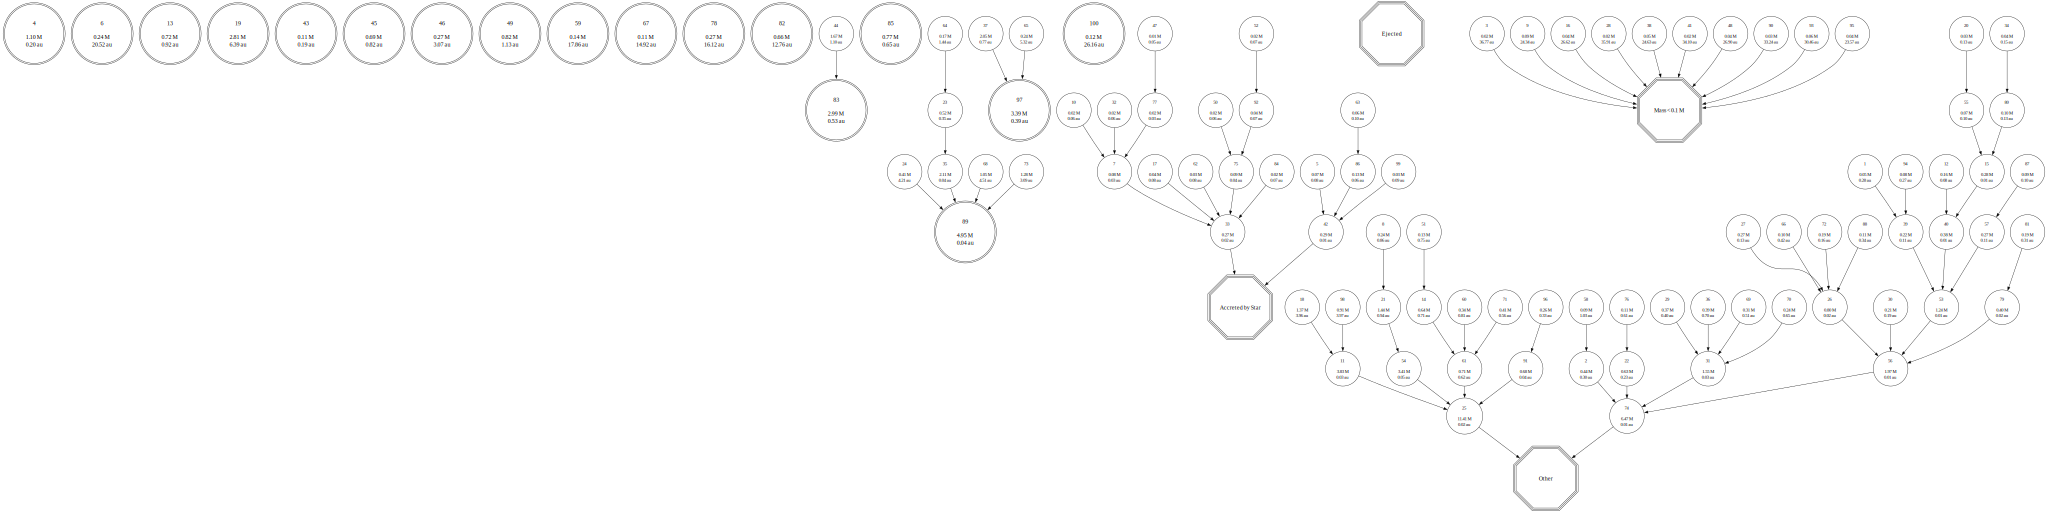

In [60]:
# Get parameters for planets (mass and semi-major axis)
params_dict = get_params(data)

# Reorganize data to be able to draw diagram
new_status_dictionary = reorganize_status_data(status_dictionary, params_dict)

# Generate the diagram
diagram = draw_status_diagram(new_status_dictionary)
diagram

We can also save it to a file.

In [61]:
# Save diagram to file

# name = ng76_run1_data[0]["simulation_name"]
# diagram.render(f'{name}/status_diagram', cleanup=True, format='png')